Importing modules and Setting up the file

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")


In [4]:
file_path = "adult.csv"
df = pd.read_csv(file_path)

Exploratory Data Analysis (EDA) and Data Visualization

In [5]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [6]:
df.shape

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe()

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [9]:
print(f"Missing Values:\n{df.isnull().sum()}")

Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [10]:
df.replace("?", np.nan, inplace=True)
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


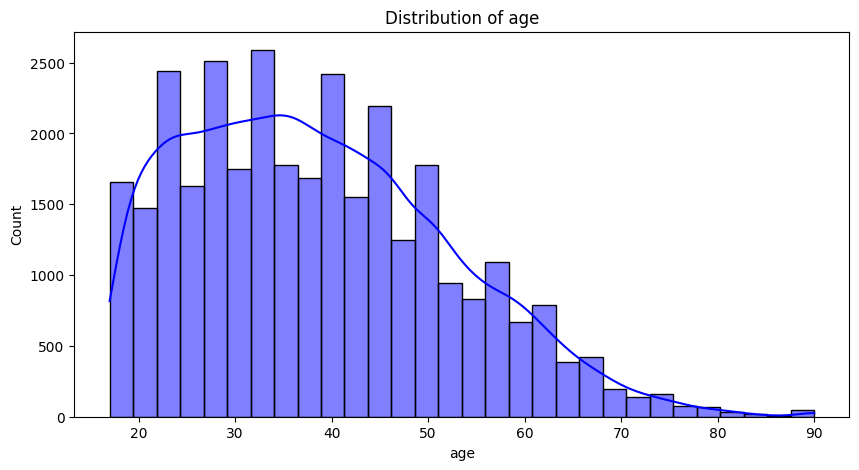

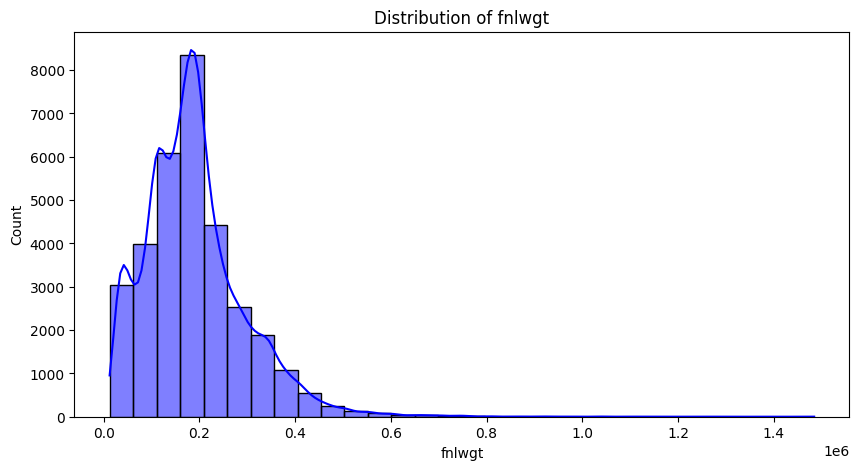

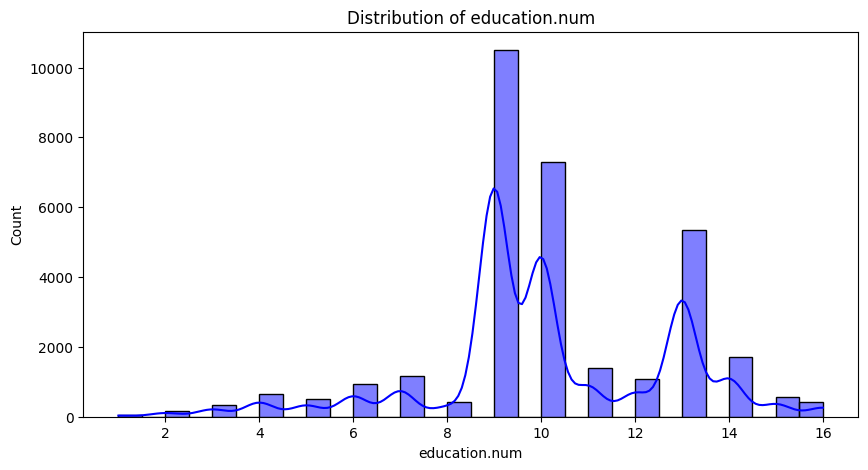

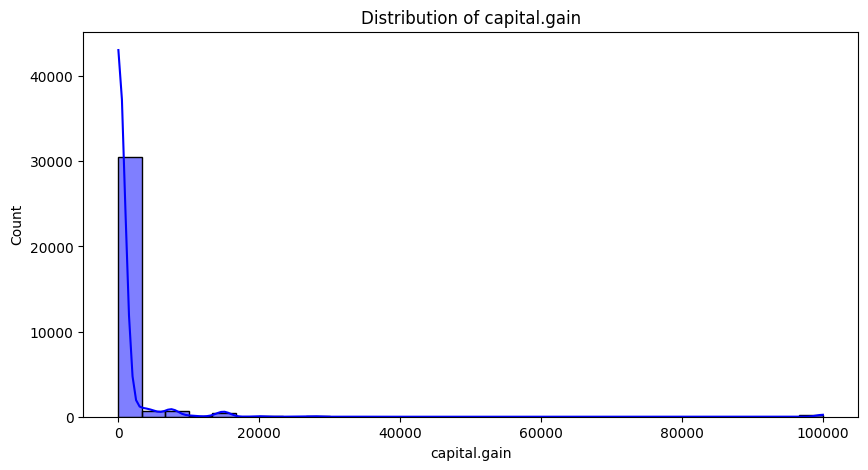

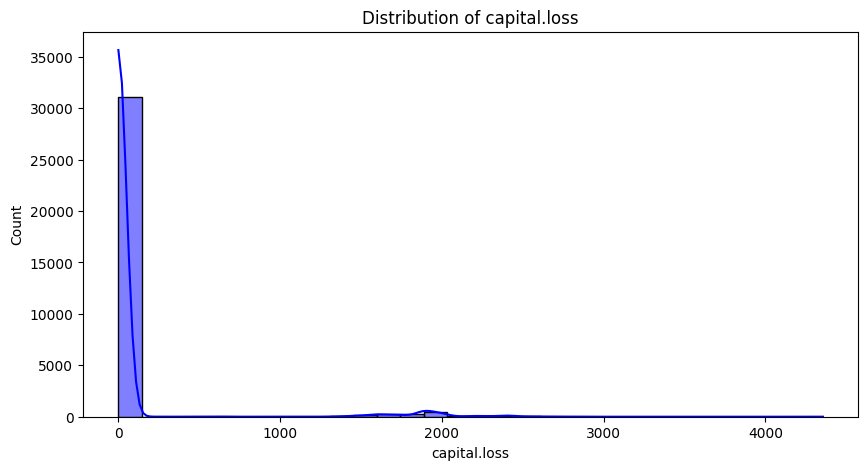

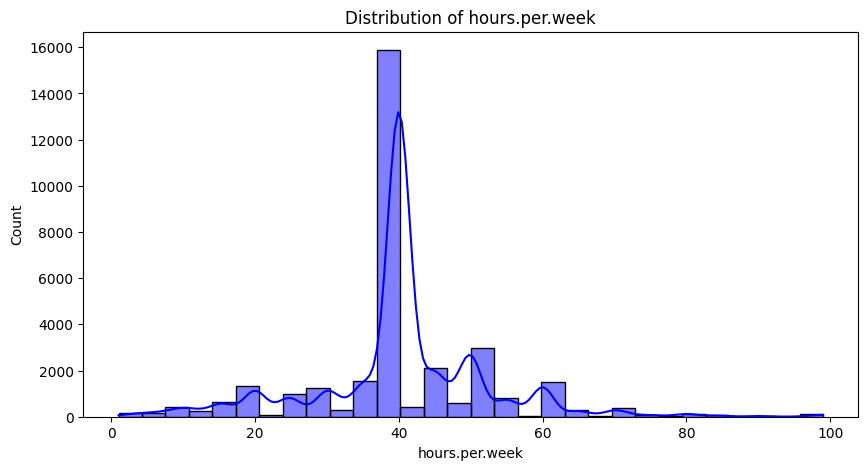

In [11]:
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

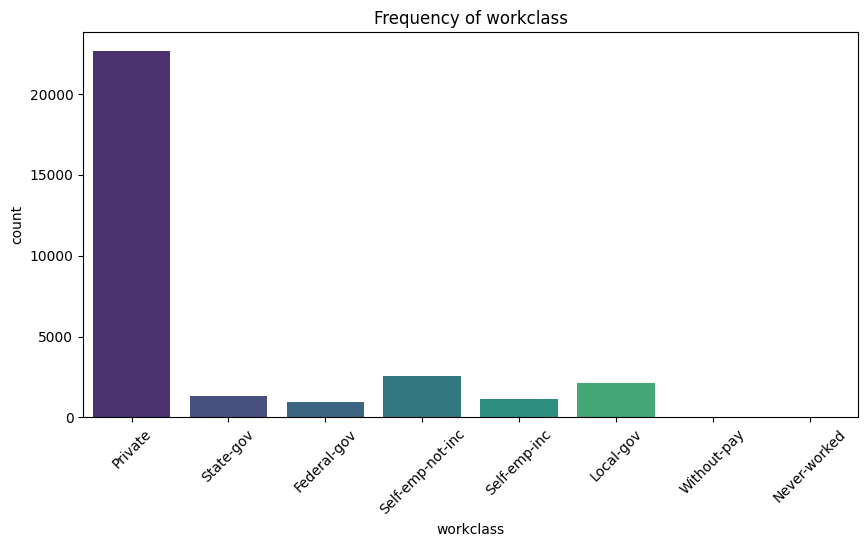

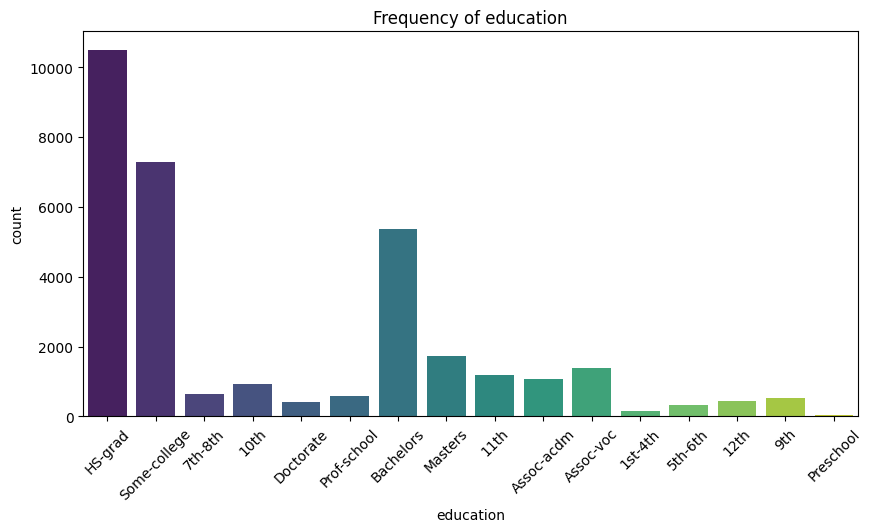

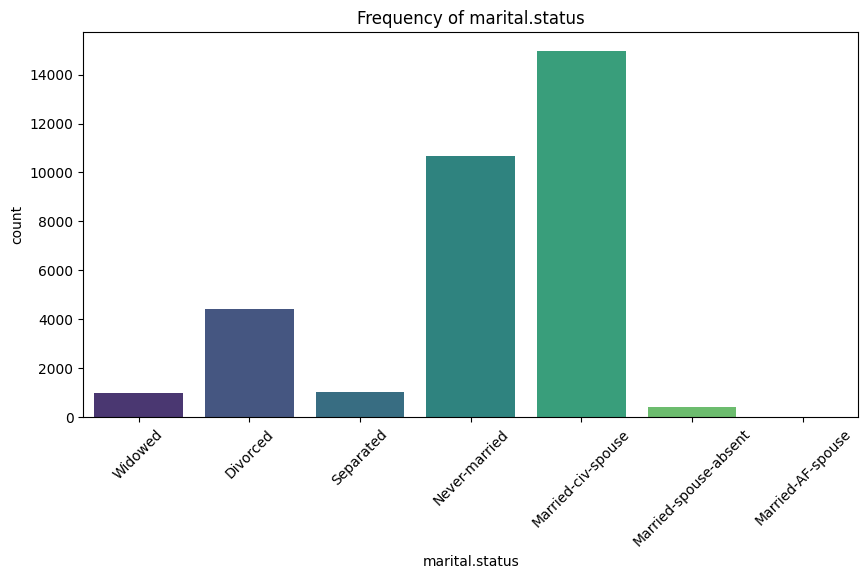

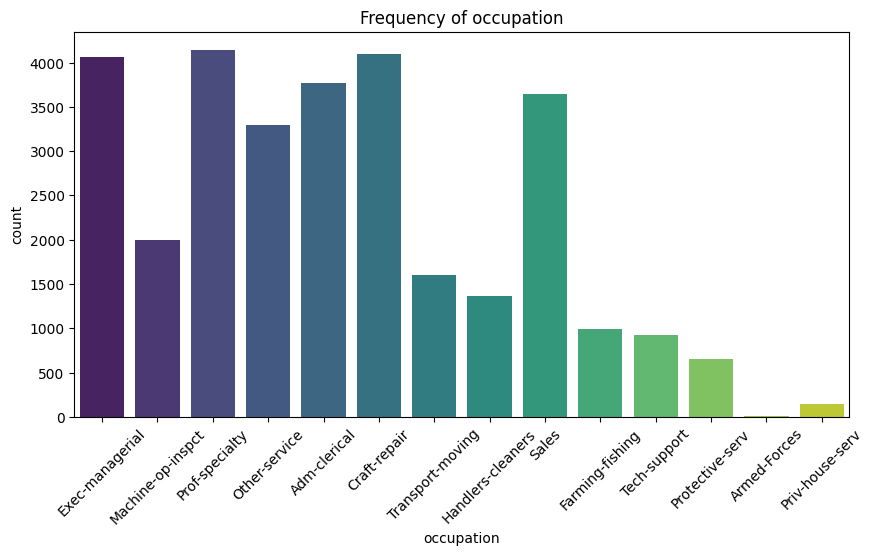

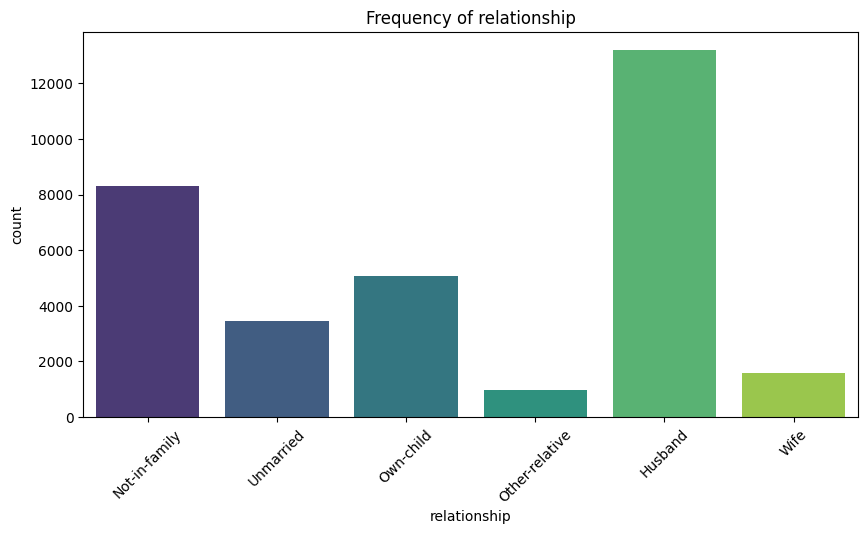

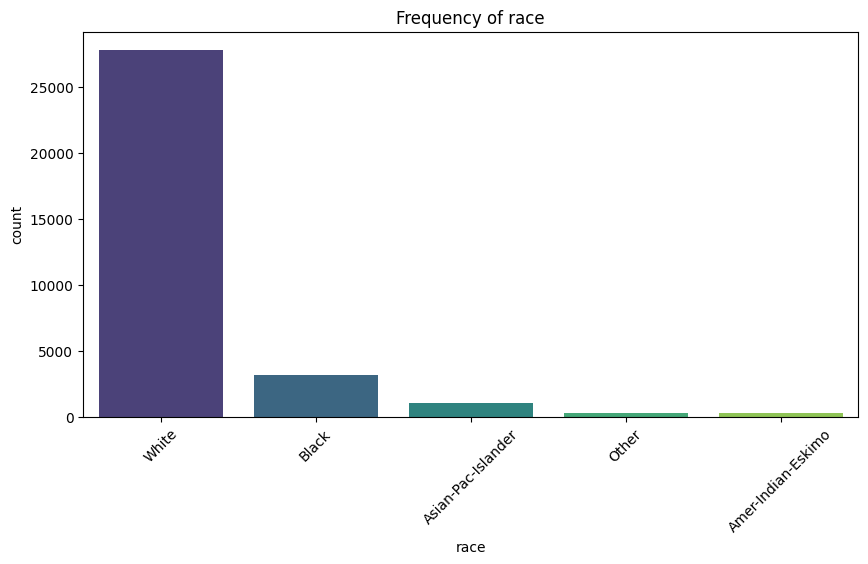

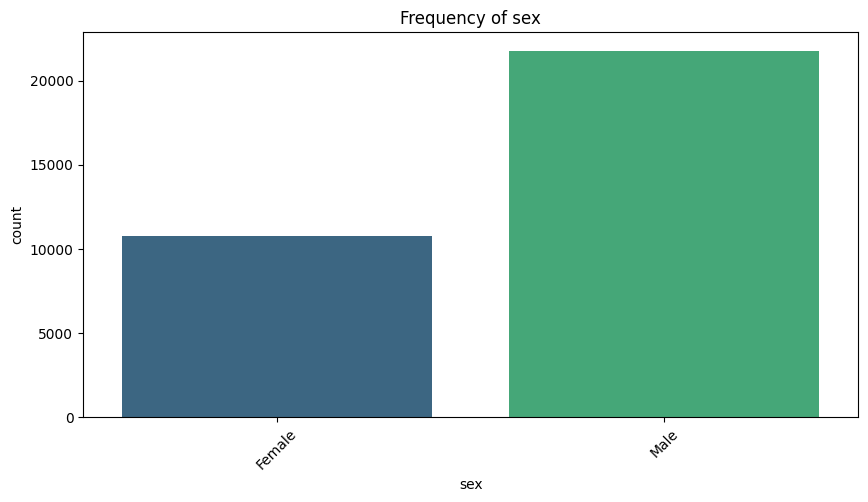

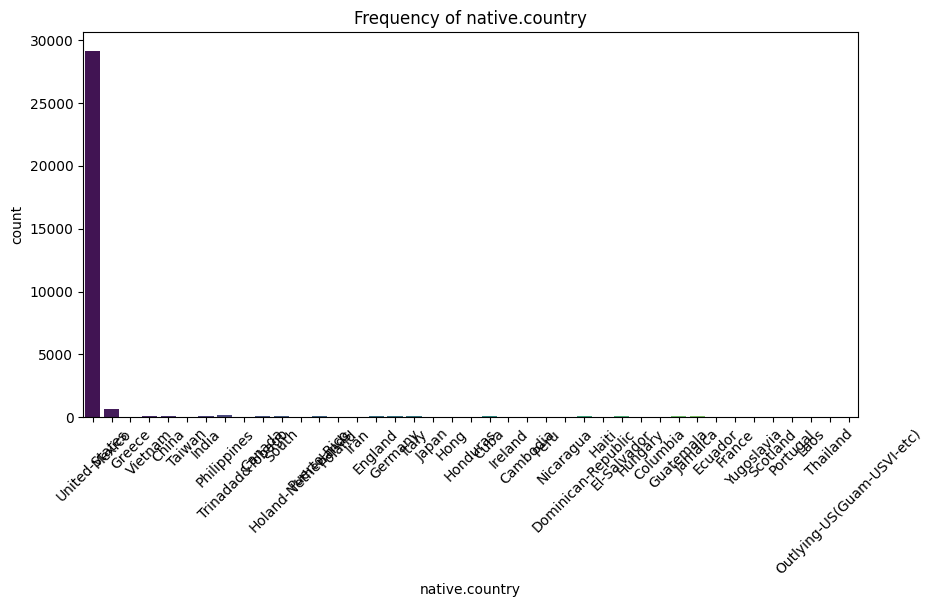

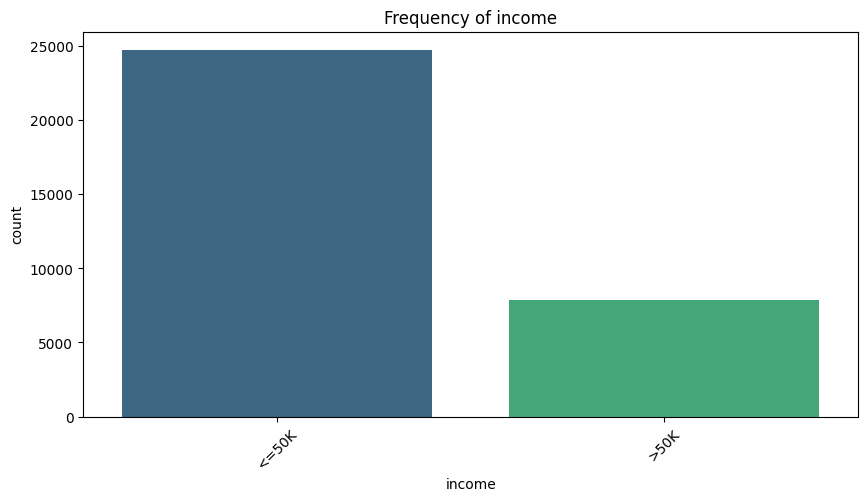

In [12]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45)
    plt.show()

Data Preprocessing

In [13]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90       NaN   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66       NaN  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                NaN  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                NaN      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [14]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [15]:
df.head()

age  workclass  fnlwgt  education  education.num  marital.status  \
0   90          8   77053         11              9               6   
1   82          3  132870         11              9               6   
2   66          8  186061         15             10               6   
3   54          3  140359          5              4               0   
4   41          3  264663         15             10               5   

   occupation  relationship  race  sex  capital.gain  capital.loss  \
0          14             1     4    0             0          4356   
1           3             1     4    0             0          4356   
2          14             4     2    0             0          4356   
3           6             4     4    0             0          3900   
4           9             3     4    0             0          3900   

   hours.per.week  native.country  income  
0              40              38       0  
1              18              38       0  
2              40              38       0  
3              40              38       0  
4              40              38       0

In [16]:
X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN implementation with Cross-Validation

Optimal k: 20


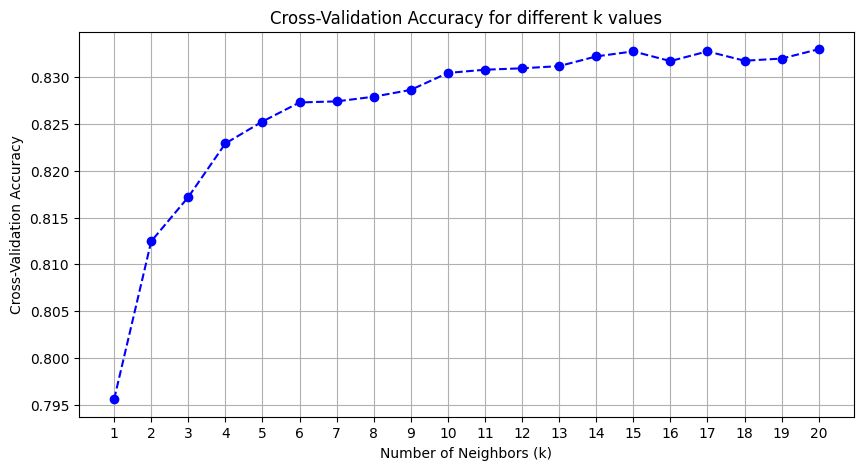

In [19]:
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal k: {optimal_k}")

plt.figure(figsize=(10, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='--', color='b')
plt.title('Cross-Validation Accuracy for different k values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()


Model Evaluation

Accuracy Score: 0.8369415016121603

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.90      4976
           1       0.71      0.53      0.60      1537

    accuracy                           0.84      6513
   macro avg       0.79      0.73      0.75      6513
weighted avg       0.83      0.84      0.83      6513



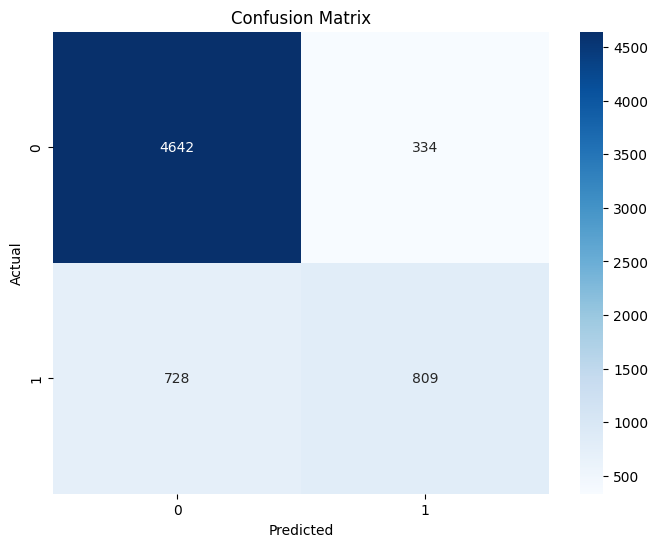

In [20]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Advanced Visualizations

In [21]:
fig = px.scatter_matrix(
    df,
    dimensions=numerical_cols,
    color='income',  
    title="Scatter Matrix of Features",
    height=800,
    width=800
)
fig.show()

# 3D Scatter Plot
fig = px.scatter_3d(
    df,
    x=numerical_cols[0],
    y=numerical_cols[1],
    z=numerical_cols[2],
    color='income',  
    title="3D Scatter Plot"
)
fig.show()


Hand-Made Loop to Test Multiple K values across Various Performance Metrics

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

results = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append((k, accuracy, precision, recall, f1))

results_df = pd.DataFrame(results, columns=['k', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

fig = px.line(
    results_df, 
    x='k', 
    y=['Accuracy', 'Precision', 'Recall', 'F1 Score'], 
    title="Performance Metrics Across Different k Values",
    labels={'value': 'Score', 'variable': 'Metric'},
    markers=True
)
fig.show()